In [15]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [16]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 200)
x_valid = np.random.uniform(-1, 1, 20)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

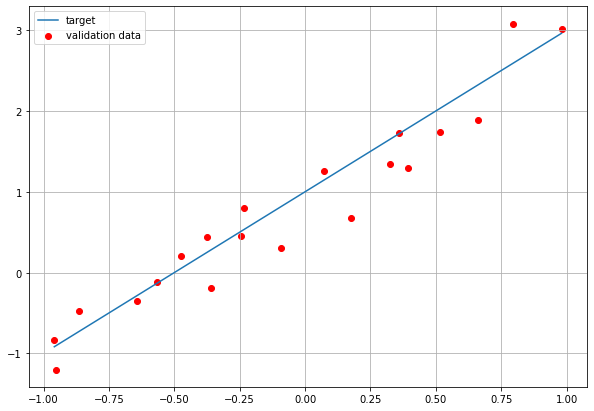

In [17]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [19]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
4/4 [==============================] - 1s 77ms/step - loss: 4.4050 - mse: 4.4050 - val_loss: 3.5881 - val_mse: 3.5881
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 4.1003 - mse: 4.1003 - val_loss: 3.3534 - val_mse: 3.3534
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 3.8223 - mse: 3.8223 - val_loss: 3.1396 - val_mse: 3.1396
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 3.5705 - mse: 3.5705 - val_loss: 2.9447 - val_mse: 2.9447
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 3.3420 - mse: 3.3420 - val_loss: 2.7662 - val_mse: 2.7662
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 3.1302 - mse: 3.1302 - val_loss: 2.6023 - val_mse: 2.6023
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 2.9374 - mse: 2.9374 - val_loss: 2.4514 - val_mse: 2.4514
Epoch 8/100
4/4 [==============================] - 0s 22ms/step - loss: 2.7610 - mse: 2.76

4/4 [==============================] - 0s 18ms/step - loss: 0.2181 - mse: 0.2181 - val_loss: 0.1982 - val_mse: 0.1982
Epoch 64/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2111 - mse: 0.2111 - val_loss: 0.1924 - val_mse: 0.1924
Epoch 65/100
4/4 [==============================] - 0s 19ms/step - loss: 0.2044 - mse: 0.2044 - val_loss: 0.1869 - val_mse: 0.1869
Epoch 66/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1981 - mse: 0.1981 - val_loss: 0.1817 - val_mse: 0.1817
Epoch 67/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1922 - mse: 0.1922 - val_loss: 0.1767 - val_mse: 0.1767
Epoch 68/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1864 - mse: 0.1864 - val_loss: 0.1721 - val_mse: 0.1721
Epoch 69/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1810 - mse: 0.1810 - val_loss: 0.1677 - val_mse: 0.1677
Epoch 70/100
4/4 [==============================] - 0s 19ms/step - loss: 0.1758 - mse: 0.1758 - 

In [21]:
# return weights and biases
model.get_weights()

[array([[1.7865988]], dtype=float32), array([0.9637866], dtype=float32)]

In [22]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 33ms/step - loss: 0.1065 - mse: 0.1065

Test loss: 0.10653092712163925
Test accuracy: 0.10653092712163925


In [23]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 35ms/step - loss: 0.0153 - mse: 0.0153

Test loss: 0.0152938487008214
Test accuracy: 0.0152938487008214


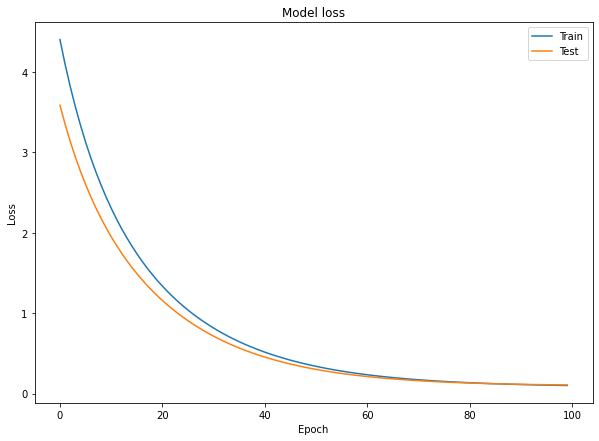

In [24]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

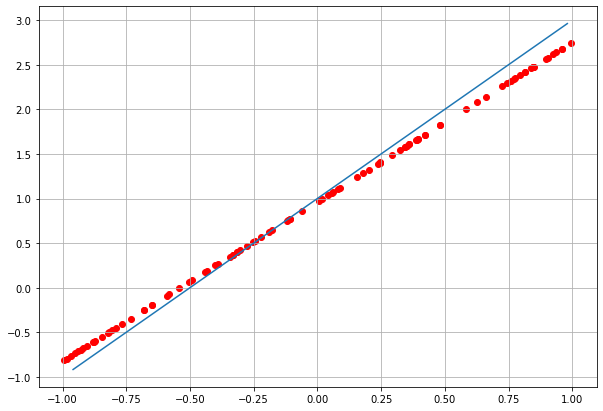

In [25]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()